In [139]:
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [140]:
def add_entries(file):
    #columns=['active_test_type','sample_size','loss','mAP',"AP_50", "AP_75", "mAP_samll", "mAP_medium", "mAP_large", "mAR_1", "mAR_10", "mAR_1000", "mAR_small", "mAR_medium", "mAR_large"]
    with open(path, 'r') as openfile:
        json_object = json.load(openfile)
    df = None
    for key,value in json_object.items():
        del value['test_stats']
        temp_df = pd.DataFrame(value, index=[key])
        if df is None:
            df = temp_df
        else:
            df = df.append(temp_df,ignore_index=True)
    return df

In [172]:
def plot_figure(data, baseline_data, y_metric):
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.plot([data['sample_size'][0], data['sample_size'][len(data['sample_size'])-1]], [baseline_data[y_metric], baseline_data[y_metric]], lw=3, label="Whole Data Set")
    plt.title("Active Testing", fontsize=30)
    plt.xlabel('# of Acquired Images',fontsize=font_size)# x轴标签
    plt.ylabel(y_metric, fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()

def plot_diff_figure(data_path, baseline_data, y_metric):
    data = add_entries(data_path)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel('# of Acquired Images',fontsize=font_size)# x轴标签
    plt.ylabel(y_metric + " diff", fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()
    
def plot_diff_precentage_figure(data_path, baseline_data, y_metric):
    data = add_entries(data_path)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel('# of Acquired Images',fontsize=font_size)# x轴标签
    plt.ylabel(y_metric + " diff %", fontsize=font_size)# y轴标签
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

def read_baseline_data(data_path):
    with open(data_path, 'r') as openfile:
        none_swin_data = json.load(openfile)
    return none_swin_data["0"]

## ResNet Backbone

In [173]:
path = "./results/MC_R50.json"
data = add_entries(path)

In [159]:
data

,active_test_type,sample_size,loss,mAP,AP_50,AP_75,mAP_samll,mAP_medium,mAP_large,mAR_1,mAR_10,mAR_1000,mAR_small,mAR_medium,mAR_large
0,MC,50,4.508008,0.620883,0.797114,0.655753,0.446790,0.662994,0.778391,0.453443,0.692428,0.766077,0.614723,0.805674,0.889301
1,MC,50,4.629544,0.599955,0.772343,0.650351,0.473397,0.673987,0.733917,0.461751,0.708193,0.760110,0.631095,0.824272,0.859610
2,MC,50,4.289993,0.668881,0.847793,0.705123,0.484827,0.628444,0.821289,0.548551,0.746093,0.792327,0.573161,0.810812,0.926560
3,MC,50,4.500547,0.580521,0.776218,0.608325,0.456219,0.623454,0.842385,0.445813,0.682967,0.723600,0.580115,0.714161,0.944719
4,MC,50,4.527263,0.620495,0.777884,0.654960,0.452149,0.600264,0.775157,0.478274,0.715111,0.773918,0.589189,0.764077,0.889619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,MC,3000,4.495189,0.515284,0.687178,0.562383,0.346854,0.549829,0.670024,0.389998,0.666046,0.738207,0.573682,0.774395,0.882253
106,MC,3000,4.490095,0.515080,0.691452,0.563761,0.352793,0.551594,0.650098,0.385760,0.665888,0.736725,0.575625,0.771052,0.876880
107,MC,3000,4.500299,0.512115,0.686683,0.556296,0.356859,0.543669,0.649908,0.386958,0.668893,0.741425,0.585116,0.768791,0.876024
108,MC,3000,4.523903,0.510664,0.684968,0.553728,0.344893,0.546528,0.646776,0.392233,0.671934,0.742667,0.579599,0.778696,0.872793


In [160]:
# test_whole = [4.4894523715317485, 0.5120231061749667, 0.6904949797373475, 0.557345203269169, 0.34863224430946455, 0.5438867449959145, 0.6520195444237461, 0.3848214366984166, 0.665645998220566, 0.7392900385561763, 0.5880698498189738, 0.7733819347376979, 0.877348759656769]
# metric = ["loss", "mAP", "AP_50", "AP_75", "mAP_samll", "mAP_medium", "mAP_large", "mAR_1", "mAR_10", "mAR_1000", "mAR_small", "mAR_medium", "mAR_large"]
# test_whole_data = {}
# for i in range(len(test_whole)):
#     test_whole_data[metric[i]] = test_whole[i]
test_whole_data = read_baseline_data("./results/None_R50.json")

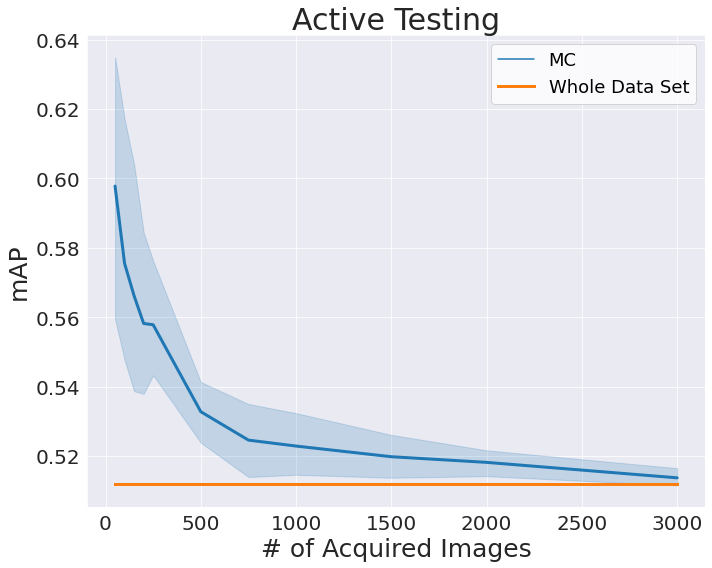

In [161]:
plot_figure(data, test_whole_data, "mAP")

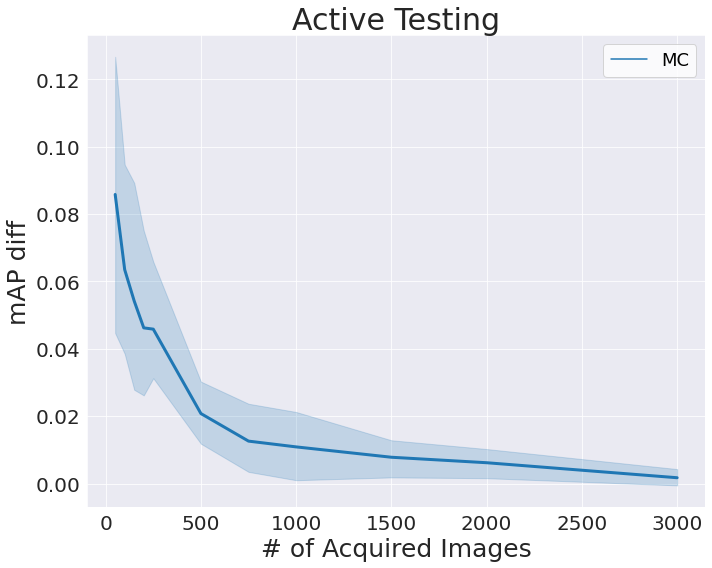

In [162]:
plot_diff_figure(path, test_whole_data, "mAP")

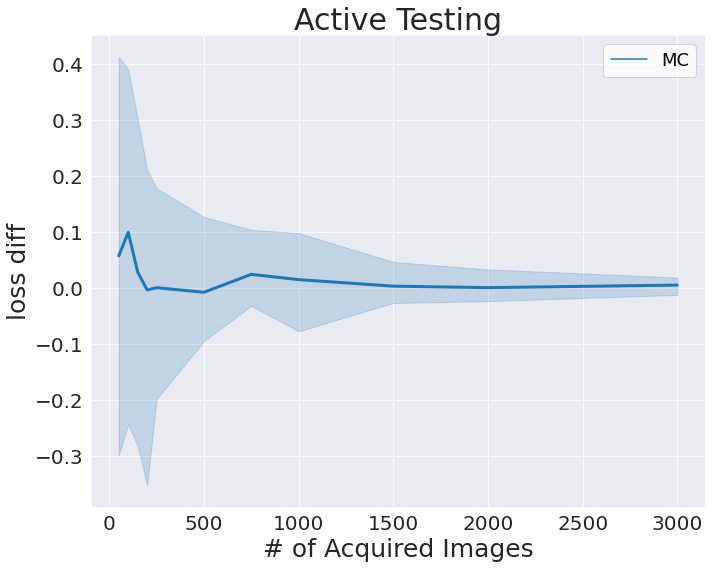

In [163]:
plot_diff_figure(path, test_whole_data, "loss")

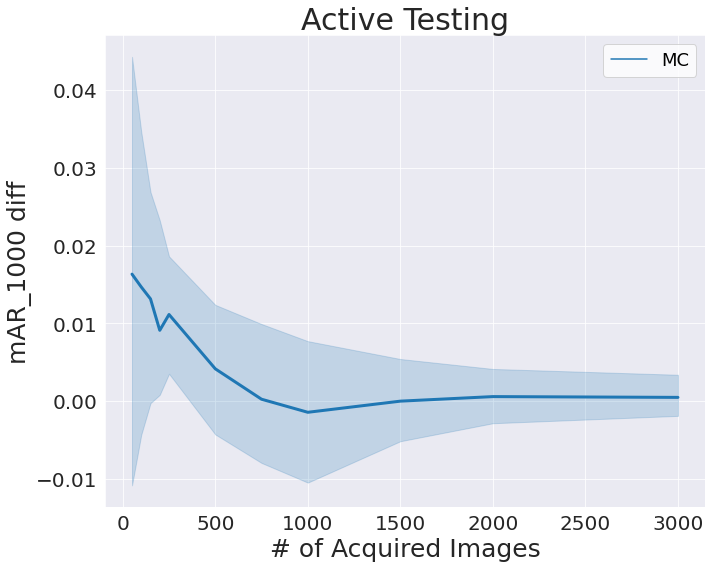

In [164]:
plot_diff_figure(path, test_whole_data, "mAR_1000")

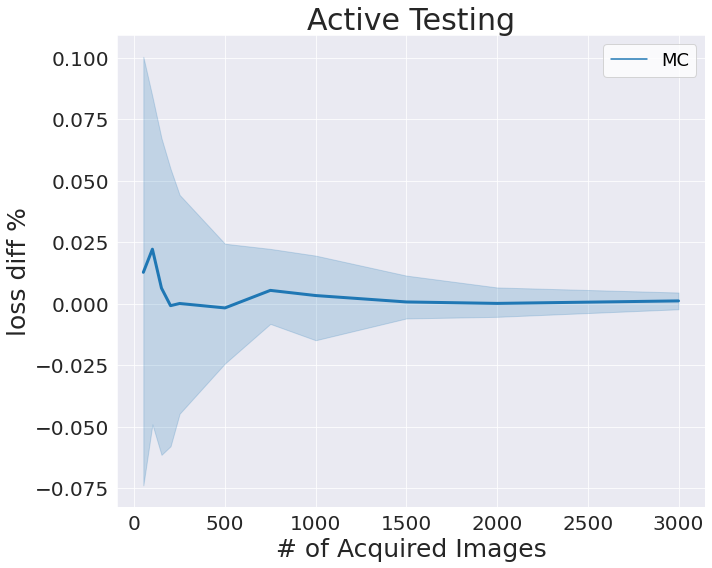

In [174]:
plot_diff_precentage_figure(path, test_whole_data, "loss")

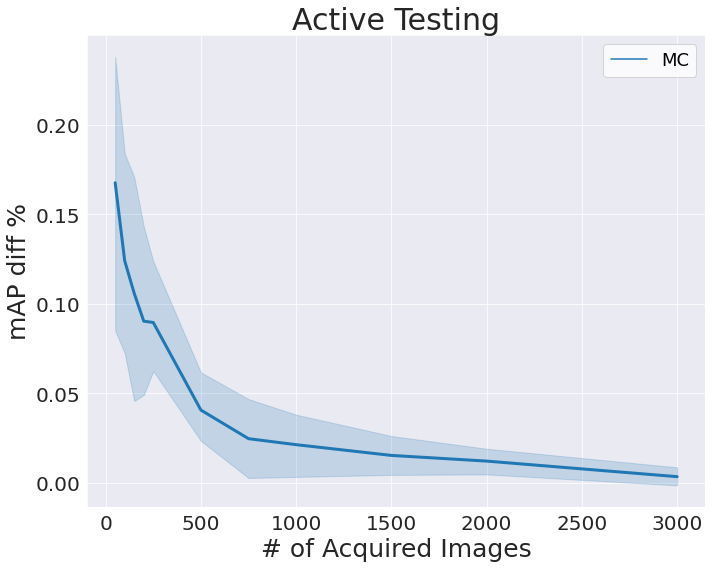

In [175]:
plot_diff_precentage_figure(path, test_whole_data, "mAP")

## SWIN Backbone

In [176]:
path = "./results/MC_swin.json"
swin_data = add_entries(path)

In [177]:
swin_data

,active_test_type,sample_size,loss,mAP,AP_50,AP_75,mAP_samll,mAP_medium,mAP_large,mAR_1,mAR_10,mAR_1000,mAR_small,mAR_medium,mAR_large
0,MC,50,3.344639,0.665459,0.837812,0.725914,0.589039,0.693110,0.854551,0.505370,0.797909,0.814349,0.716095,0.818948,0.935052
1,MC,50,3.355080,0.633014,0.790804,0.666882,0.449054,0.699048,0.791620,0.495352,0.727602,0.765860,0.585621,0.790898,0.901387
2,MC,50,4.493350,0.633954,0.781514,0.698757,0.451194,0.680019,0.830679,0.504366,0.715100,0.760065,0.582058,0.814136,0.917770
3,MC,50,3.580015,0.687652,0.871985,0.741743,0.530808,0.738632,0.862725,0.526033,0.766918,0.808822,0.656405,0.815201,0.938361
4,MC,50,3.754536,0.724913,0.872024,0.794648,0.513224,0.790267,0.824951,0.596870,0.796843,0.837245,0.676792,0.850834,0.903556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,MC,3000,3.905030,0.584475,0.774025,0.641051,0.411052,0.631867,0.735228,0.412932,0.699852,0.766501,0.625566,0.813901,0.906008
106,MC,3000,3.925068,0.583793,0.771426,0.640373,0.413215,0.620360,0.747059,0.415652,0.701765,0.767877,0.631324,0.805807,0.912318
107,MC,3000,3.912403,0.590691,0.776880,0.643722,0.418804,0.638710,0.739674,0.419677,0.703059,0.769754,0.629498,0.810937,0.904870
108,MC,3000,3.850150,0.585600,0.775498,0.640289,0.411840,0.625945,0.747864,0.415948,0.701153,0.768840,0.625103,0.803141,0.912746


In [167]:
none_swin_data = read_baseline_data("./results/None_swin.json")

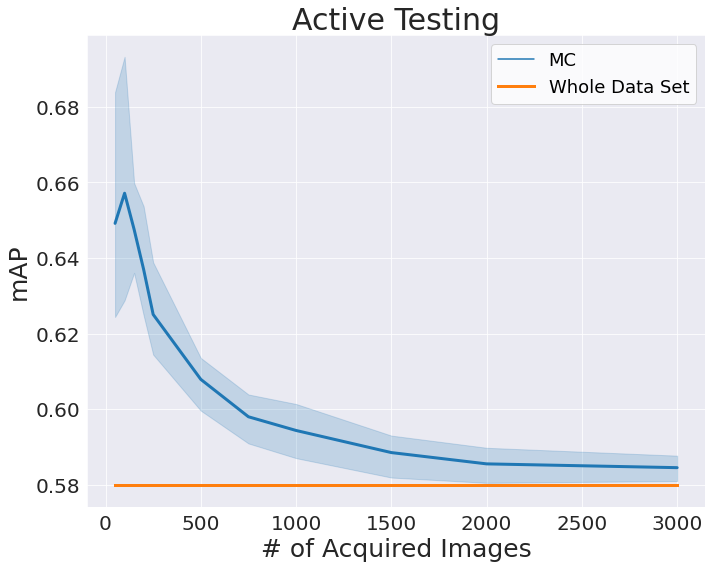

In [168]:
plot_figure(swin_data, none_swin_data, "mAP")

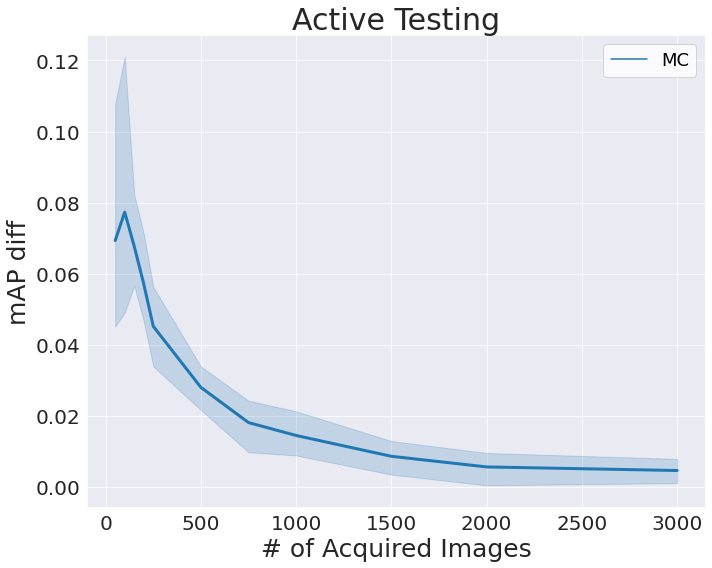

In [169]:
plot_diff_figure(swin_data, none_swin_data, "mAP")

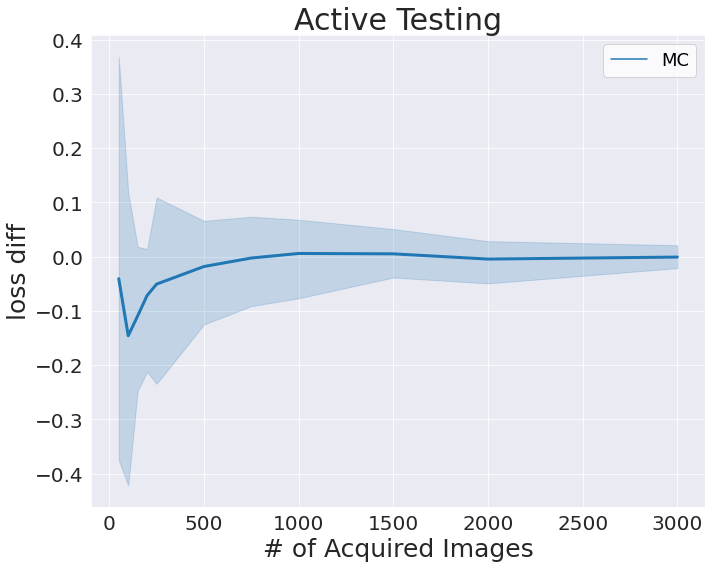

In [170]:
plot_diff_figure(swin_data, none_swin_data, "loss")

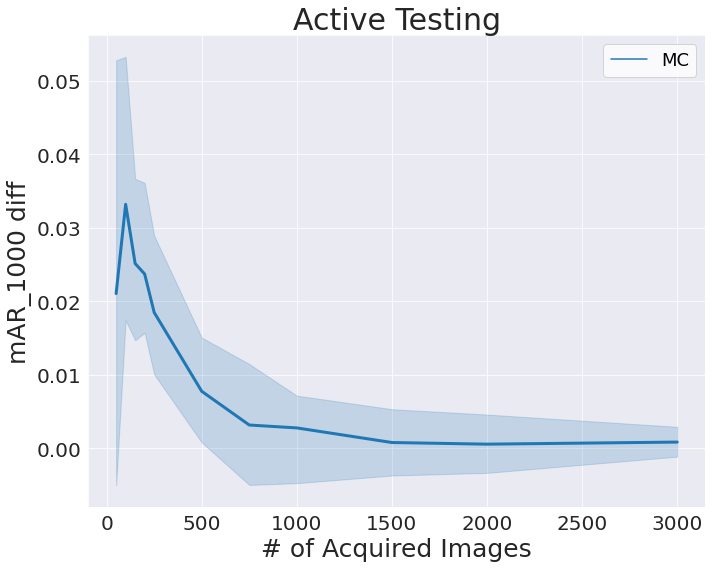

In [171]:
plot_diff_figure(swin_data, none_swin_data, "mAR_1000")

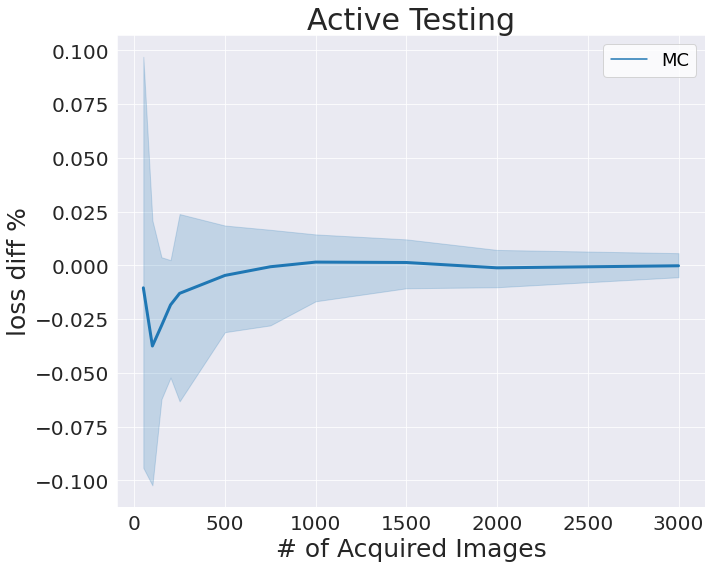

In [178]:
plot_diff_precentage_figure(path, none_swin_data, "loss")

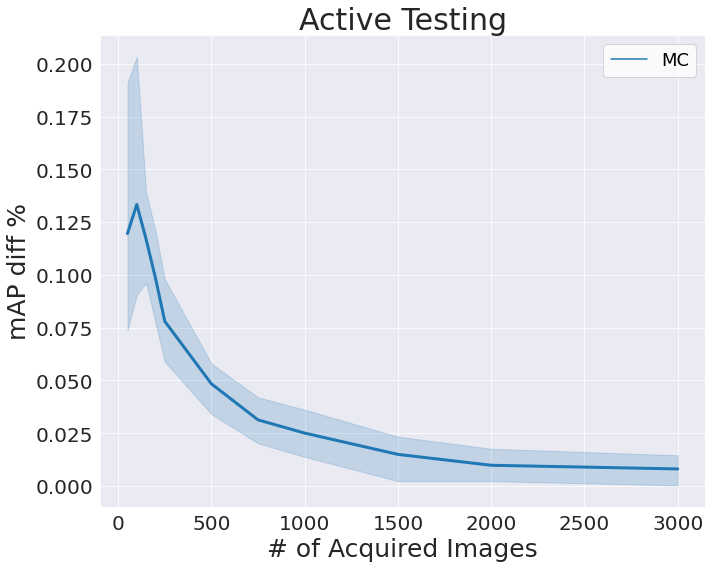

In [179]:
plot_diff_precentage_figure(path, none_swin_data, "mAP")